> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Analyzing The Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### In this report you will find analysis of the movie database where we try to understand it's main attributes, their inter-relations and the main driver of movies popularity and revenues.

### The movie database contains informations about more than 10000 movies such as their budget, revenue, release year, genres, votes , popularity, budget and revenue inflation rate.

### We will focus on finding answers for the following questions:
### 1- What are the characteristics for the main attributes of movies and how they have changed per years ?
### 2- What are the different genres of movies and their properties?
### 3- What are the top movies with highest revenues?
### 4- Which are the attributes that were associated with the high revenues for each movie?

### We will start with investigating general properties of the data then checking it's quality by looking for duplicates or missing data then we will clean the data and remove irrlevant attributes.  After that, we will use functions and visualizations to understand the underlying trends and relations and finally we will draw our conclusions. 

In [109]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### We start with loading the data and  view it's shape and data types. Then, we will check for missing values and  duplicates.  

In [110]:
df = pd.read_csv(r'E:\Data\FWD\Profissional\2\Data\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [111]:
df.shape

(10866, 21)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [113]:
df.duplicated().sum()

1

In [114]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 
### We will remove missing values, duplicates, irrlevant attributes and rename columns

In [115]:
df.drop_duplicates(inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [116]:
df.drop(['id','imdb_id', 'cast', 'homepage','director', 'tagline','keywords', 'overview', 'runtime','release_date','production_companies'], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   genres          10842 non-null  object 
 5   vote_count      10865 non-null  int64  
 6   vote_average    10865 non-null  float64
 7   release_year    10865 non-null  int64  
 8   budget_adj      10865 non-null  float64
 9   revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 933.7+ KB


In [117]:
df.head()

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [118]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [119]:
df.dropna(inplace=True)
df.shape

(10842, 10)

In [120]:
df.duplicated().sum()

0

In [121]:
df.rename(columns={'original_title':'title'}, inplace=True)

### Now, Our data are ready for analysis. We will start asking relevant questions.

### 1- What are the characteristics for the main attributes of movies and how they have changed per years ?
#### We need to understand different attributes to determine which of them are more important and the significant of their effect on the success of movies presented in revenues and ratings

<a id='eda'></a>
## Exploratory Data Analysis

#### We will start with understanding discribtive stastics of different attributes then we will see the correlation between them to understand which attributes have similar behaviour.

In [122]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Here you can see different statistics foreach attributes such as maxmum, average and minimum

In [123]:
df.corr()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545271,0.663268,0.800786,0.210432,0.090200,0.513311,0.608964
budget,0.545271,1.000000,0.734851,0.632601,0.081729,0.116312,0.968949,0.622406
revenue,0.663268,0.734851,1.000000,0.791122,0.173254,0.057324,0.706360,0.919088
vote_count,0.800786,0.632601,0.791122,1.000000,0.254698,0.108275,0.586923,0.707865
vote_average,0.210432,0.081729,0.173254,0.254698,1.000000,-0.119851,0.093811,0.193836
release_year,0.090200,0.116312,0.057324,0.108275,-0.119851,1.000000,0.017076,-0.066118
budget_adj,0.513311,0.968949,0.706360,0.586923,0.093811,0.017076,1.000000,0.646507
revenue_adj,0.608964,0.622406,0.919088,0.707865,0.193836,-0.066118,0.646507,1.000000


#### We can see here correlations. For examble, You can see high correlation between popularity and vote count, revenue and budget and revenue and vote count
#### Note that correlation doesn't mean causation but it discribe a common behaviour between attributes

In [124]:
df.release_year.value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1973     55
1971     55
1976     47
1966     46
1974     46
1975     44
1964     42
1972     40
1967     40
1970     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

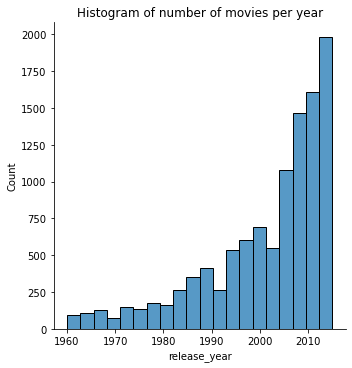

In [125]:
sns.displot(df['release_year'],kde=False, bins =20).set(title='Histogram of number of movies per year')

#### As shown in the graph, Number of released movies per year has increased rapidly in the 2000s.

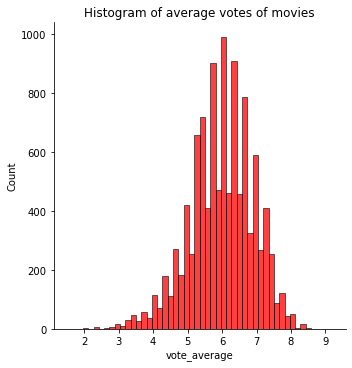

In [126]:
sns.displot(df['vote_average'],kde=False, bins =50, color='red').set(title='Histogram of average votes of movies')

#### As shown in the graph, Most of movies have votes average between 5 and 7 where 6 is the most common vote average.

Text(0.5, 0.98, 'Relations between different attributes of movies')

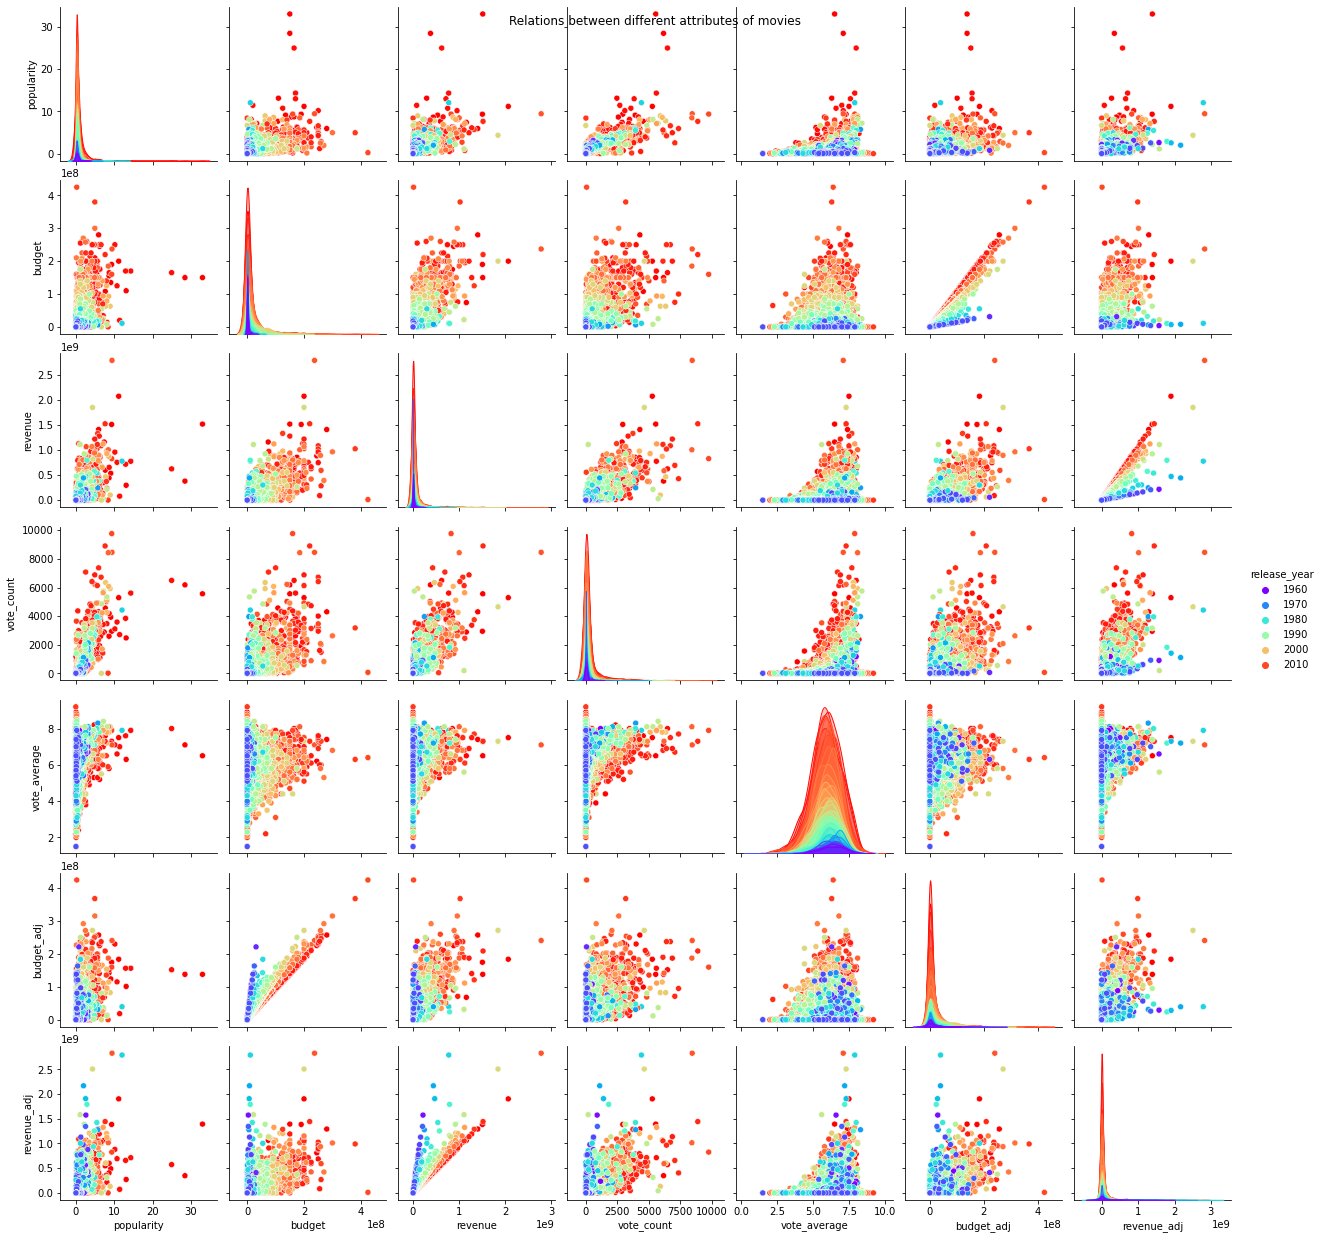

In [172]:
sns.pairplot(df, hue='release_year', palette='rainbow').fig.suptitle('Relations between different attributes of movies')

#### In the previous graph, You can see relations between attributes of movies. For examble you see can a positive relation between revenues and votes average. You can also see that after 2010 budget, revenues, vote average and popularity have increased.

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>]],
      dtype=object)

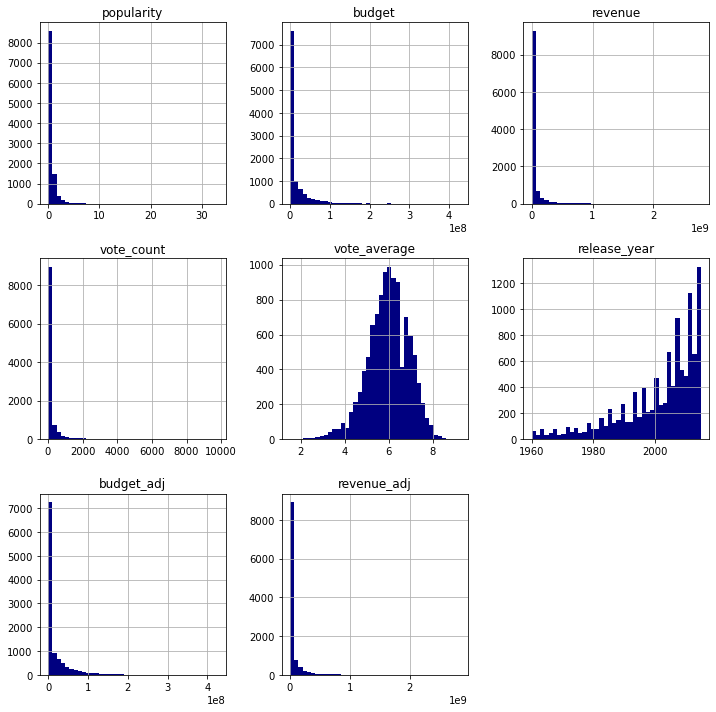

In [128]:
df.hist(figsize=(12,12), bins=40, color='navy')

#### Here we can see the distribution of each attribute.

### - You can see now the different characterstics of attributes, their statstics and distributions. You can see that through the years budget, revenues, vote average and popularity have increased which reflects the huge development in movies development in terms of investment, profits and bigger fan base.

### 2- What are the different genres of movies and their properties?

#### We need to understand different genres to see which ones have higher popularity, vote averages and increased number over the years

#### Analyzing different tyoes of genres, number of movies for each type and their popularity through the years

In [129]:
df['genres'].str.contains('Action').sum()

2384

In [130]:
Action = df[df['genres'].str.contains('Action')]
Action.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
6,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08


Text(0.5, 0.98, 'Relation between Vote average and popularity of Action movies')

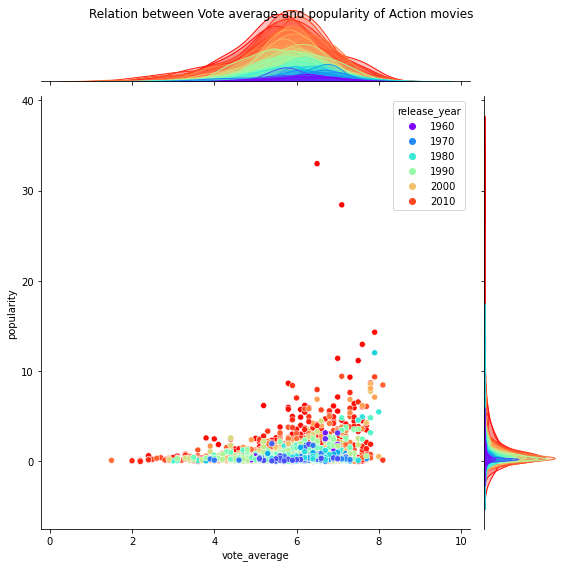

In [131]:
sns.jointplot(x='vote_average', y='popularity',hue='release_year',height=8, data=Action, palette='rainbow').fig.suptitle('Relation between Vote average and popularity of Action movies')

#### As shown, There is a positive relation between vote average and popularity after 2010 and I think. It's a result of the widespread of social media which made people review ratings and influance others which increased popularity. Popularity of Action movies is mostly between 0 and 10.

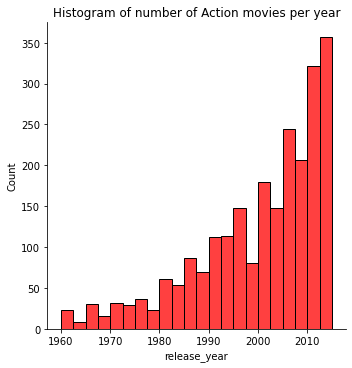

In [132]:
sns.displot(Action['release_year'], color='red').set(title='Histogram of number of Action movies per year')

#### As shown, Number of Action movies has increased significantly over the last 20 years compared to the previous 20. 

In [133]:
df['genres'].str.contains('Drama').sum()

4760

In [134]:
Drama = df[df['genres'].str.contains('Drama')]
Drama.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
5,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08
7,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
12,6.118847,15000000,36869414,Ex Machina,Drama|Science Fiction,2854,7.6,2015,1.379999e+07,3.391985e+07
15,5.898400,44000000,155760117,The Hateful Eight,Crime|Drama|Mystery|Western,2389,7.4,2015,4.047998e+07,1.432992e+08
18,5.556818,95000000,542351353,Cinderella,Romance|Fantasy|Family|Drama,1495,6.8,2015,8.739996e+07,4.989630e+08


Text(0.5, 0.98, 'Relation between Vote average and popularity of Drama movies')

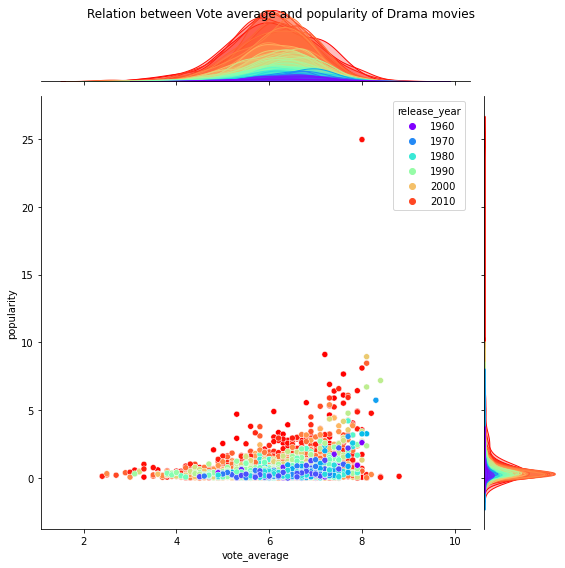

In [135]:
sns.jointplot(x='vote_average', y='popularity',hue='release_year',height=8, data=Drama, palette='rainbow').fig.suptitle('Relation between Vote average and popularity of Drama movies')

#### Popularity of Drama movies is mostly between 0 and 5 which is less than Action movies but Drama movies have some higher vote average.

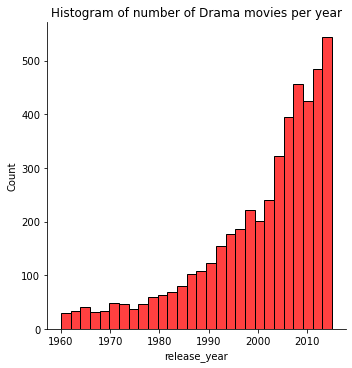

In [136]:
sns.displot(Drama['release_year'], color='red').set(title='Histogram of number of Drama movies per year')

#### As shown, Number of Drama movies has increased significantly from 2005.

In [137]:
df['genres'].str.contains('Thriller').sum()

2907

In [138]:
Thriller = df[df['genres'].str.contains('Thriller')]
Thriller.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08


Text(0.5, 0.98, 'Relation between Vote average and popularity of Thriller movies')

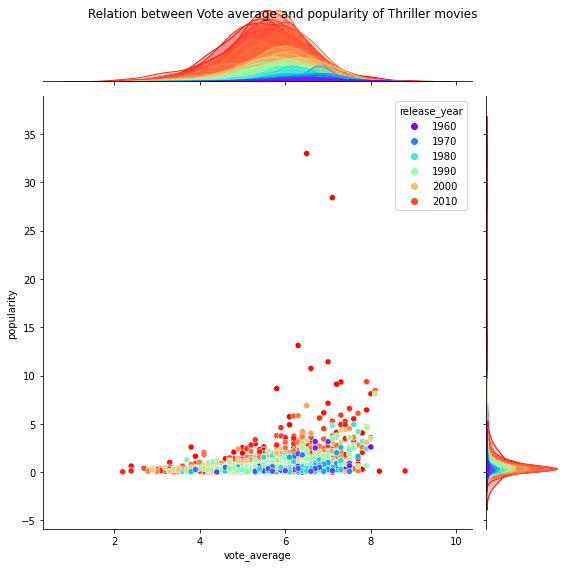

In [139]:
sns.jointplot(x='vote_average', y='popularity',hue='release_year',height=8, data=Thriller, palette='rainbow').fig.suptitle('Relation between Vote average and popularity of Thriller movies')

#### Popularity of Thriller movies is mostly between 0 and 5 which is also less than Action movie.

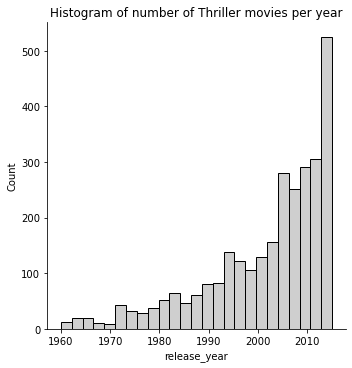

In [140]:
sns.displot(Thriller['release_year'], color='silver').set(title='Histogram of number of Thriller movies per year')


#### As shown, Number of Thiller movies has increased significantly from 2005.

In [141]:
df['genres'].str.contains('Science Fiction').sum()

1229

In [142]:
Science_Fiction = df[df['genres'].str.contains('Science Fiction')]
Science_Fiction.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
6,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08


E:\Data\Python Udemy\ANACONDA\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Relation between Vote average and popularity of Science Fiction movies')

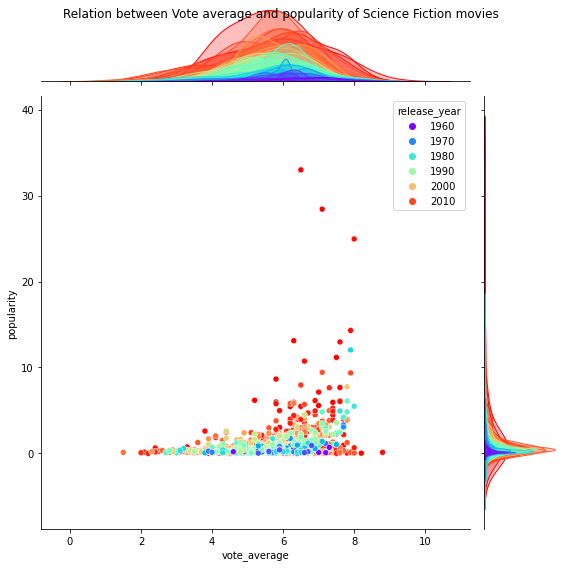

In [143]:
sns.jointplot(x='vote_average', y='popularity',hue='release_year',height=8, data=Science_Fiction, palette='rainbow').fig.suptitle('Relation between Vote average and popularity of Science Fiction movies')

#### Popularity of Science Fiction movies is mostly between 0 and 10 and their vote average is mainly between 6 and 8.

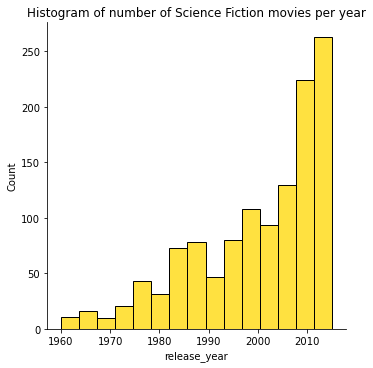

In [144]:
sns.displot(Science_Fiction['release_year'], color='gold').set(title='Histogram of number of Science Fiction movies per year')

In [145]:
# As shown, Number of Science Fiction movies has increased significantly from 2010.

In [146]:
df['genres'].str.contains('Adventure').sum()

1471

In [147]:
Adventure = df[df['genres'].str.contains('Adventure')]
Adventure.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
5,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08


Text(0.5, 0.98, 'Relation between Vote average and popularity of Adventure movies')

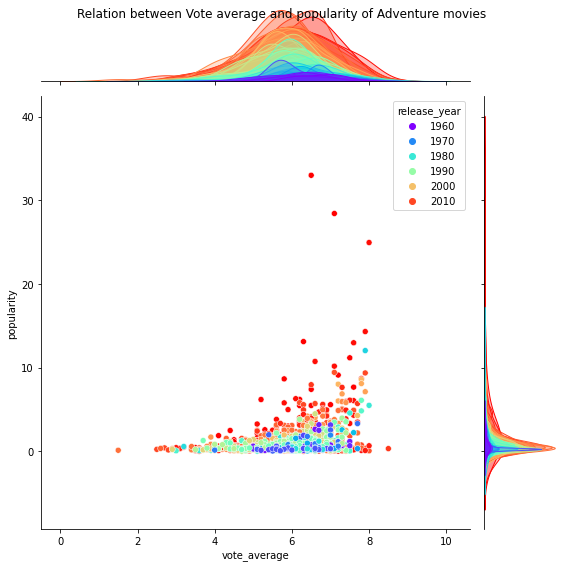

In [148]:
sns.jointplot(x='vote_average', y='popularity',hue='release_year',height=8, data=Adventure, palette='rainbow').fig.suptitle('Relation between Vote average and popularity of Adventure movies')

#### Popularity of Adventure movies is mostly between 0 and 10 and their vote average is mainly between 6 and 8.

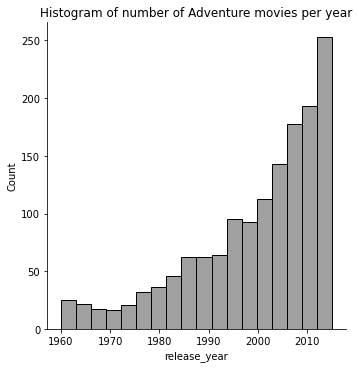

In [149]:
sns.displot(Adventure['release_year'], color='gray').set(title='Histogram of number of Adventure movies per year')


#### As shown, Number of Adventure movies has increased gradually over the years.

In [150]:
df['genres'].str.contains('Crime').sum()

1354

In [151]:
Crime = df[df['genres'].str.contains('Crime')]
Crime.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
10,6.200282,245000000,880674609,Spectre,Action|Adventure|Crime,3254,6.2,2015,2.253999e+08,8.102203e+08
15,5.898400,44000000,155760117,The Hateful Eight,Crime|Drama|Mystery|Western,2389,7.4,2015,4.047998e+07,1.432992e+08
16,5.749758,48000000,325771424,Taken 3,Crime|Action|Thriller,1578,6.1,2015,4.415998e+07,2.997096e+08
27,4.503789,81000000,403802136,Kingsman: The Secret Service,Crime|Comedy|Action|Adventure,3833,7.6,2015,7.451997e+07,3.714978e+08


Text(0.5, 0.98, 'Relation between Vote average and popularity of Crime movies')

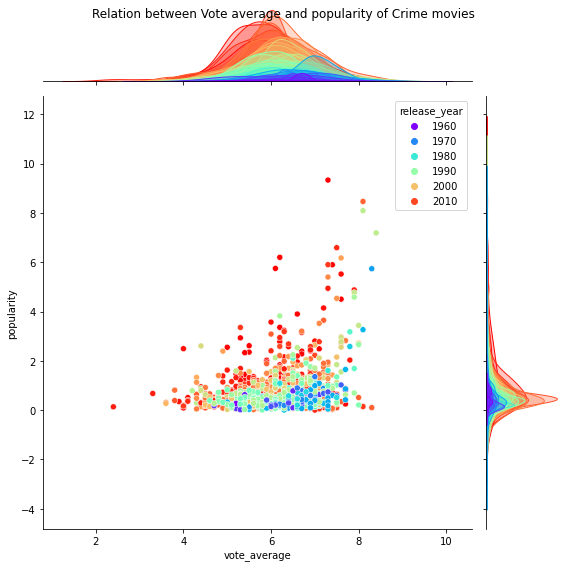

In [152]:
sns.jointplot(x='vote_average', y='popularity',hue='release_year',height=8, data=Crime, palette='rainbow').fig.suptitle('Relation between Vote average and popularity of Crime movies')

#### Popularity of Crime movies is significantly lower than other genres. However, their vote ratings are mostly in the same region between 6 and 8.

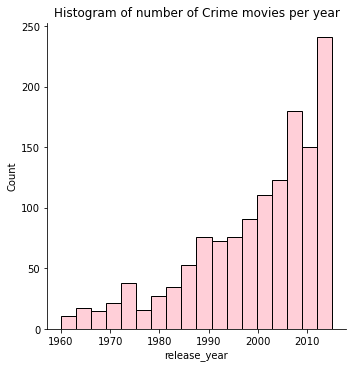

In [153]:
sns.displot(Crime['release_year'], color='pink').set(title='Histogram of number of Crime movies per year')

#### As shown, Number of Crime movies has increased gradually over the years.

In [154]:
df['genres'].str.contains('Family').sum()

1231

In [155]:
Family = df[df['genres'].str.contains('Family')]
Family.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,7.404165,74000000,1156730962,Minions,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Comedy|Animation|Family,3935,8.0,2015,1.609999e+08,7.854116e+08
18,5.556818,95000000,542351353,Cinderella,Romance|Fantasy|Family|Drama,1495,6.8,2015,8.739996e+07,4.989630e+08
20,5.462138,190000000,209035668,Tomorrowland,Action|Family|Science Fiction|Adventure|Mystery,1899,6.2,2015,1.747999e+08,1.923127e+08
37,3.339135,175000000,331926147,The Good Dinosaur,Adventure|Animation|Comedy|Family|Fantasy,1087,6.6,2015,1.609999e+08,3.053719e+08


Text(0.5, 0.98, 'Relation between Vote average and popularity of Family movies')

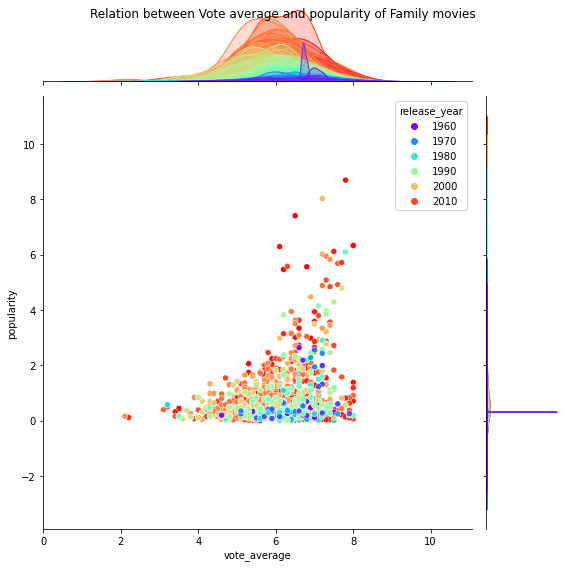

In [156]:
sns.jointplot(x='vote_average', y='popularity',hue='release_year',height=8, data=Family, palette='rainbow').fig.suptitle('Relation between Vote average and popularity of Family movies')

#### Family of Crime movies is also significantly lower than other genres. However, their vote ratings are mostly in the same region between 6 and 8.

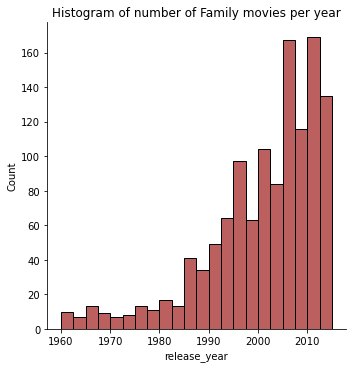

In [157]:
sns.displot(Family['release_year'], color='brown').set(title='Histogram of number of Family movies per year')

#### As shown, Number of Family movies has increased gradually over the years but it's below other genres numbers.

Text(0.5, 0.98, 'Votes_Average change through years')

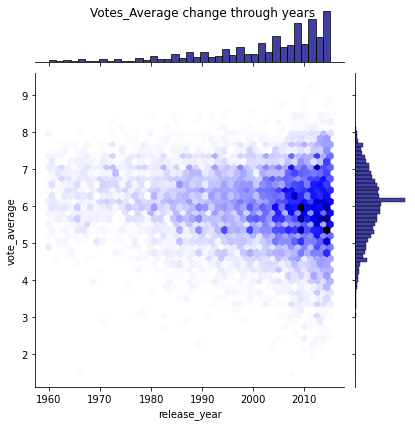

In [158]:
sns.jointplot(data=df, x='release_year', y='vote_average',kind='hex',color='navy').fig.suptitle('Votes_Average change through years')

#### Vote_average has been increasing over the years and i think that reflects the development in the Movies industry and the effect of social media which encouraged people to view , share their opinions and vote for different movies

Text(0.5, 0.98, 'Budgets change through years')

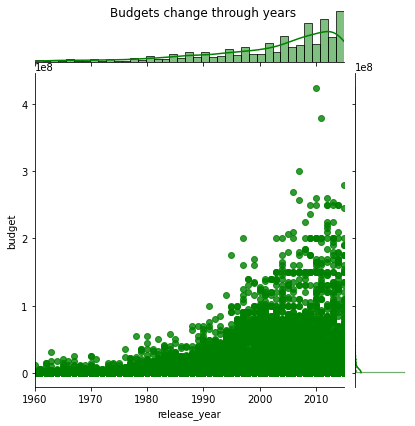

In [159]:
sns.jointplot(data=df, x='release_year', y='budget',kind='reg',color='green').fig.suptitle('Budgets change through years')

#### Movies budgets have been increasing  signficantly over the years and i think that helped the industry t o increase movies qualities which is reflected in the higher revenues

Text(0.5, 0.98, 'Budgets Inflation change through years')

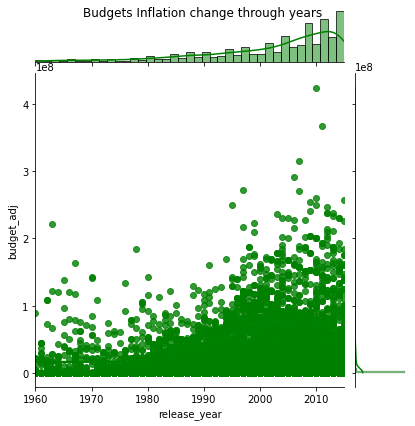

In [160]:
sns.jointplot(data=df, x='release_year', y='budget_adj',kind='reg',color='green').fig.suptitle('Budgets Inflation change through years')

Text(0.5, 0.98, 'Revenues change through years')

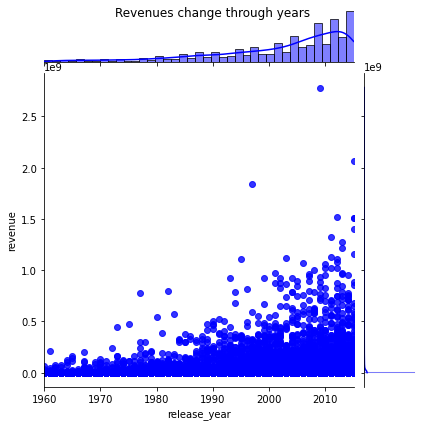

In [161]:
sns.jointplot(data=df, x='release_year', y='revenue',kind='reg',color='blue').fig.suptitle('Revenues change through years')

#### Movies revenues have been increasing  signficantly over the years and as mentioned before it's a reflect to the big investment in the industry

Text(0.5, 0.98, 'Revenues Inflation change through years')

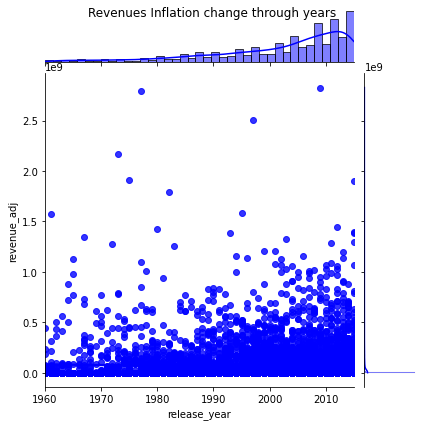

In [162]:
sns.jointplot(data=df, x='release_year', y='revenue_adj',kind='reg',color='blue').fig.suptitle('Revenues Inflation change through years')

####  - Now you can see different genres of movies, their numbers, popularity and ratings. As you saw Drama is the most commen genre then Action and Thiller movies come next and after them come Adventure and Science fiction movies in terms in number of movies.
####  - Action movies have highest popularity where Family and Crime movies have the lowest.
#### - All genres have vote averages between 6 and 8 which is realisticly.
####  - Budgets and revenues have incereased significantly in the last few years. 

## Analysis of top 200 movies with highest revenues

### 3- What are the top movies with highest revenues?

#### Here we will view the top 200 movies with highest revenues to understand their different properties and discover the main factors behind their revenues

####  Creating new database with top 200 movies with highest revenues


In [163]:
df_high_rev = df.sort_values(by=['revenue'], ignore_index=True, ascending=False).head(200)
df_high_rev.head()

,popularity,budget,revenue,title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,9.432768,237000000,2781505847,Avatar,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09
1,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
2,4.355219,200000000,1845034188,Titanic,Drama|Romance|Thriller,4654,7.3,1997,2.716921e+08,2.506406e+09
3,7.637767,220000000,1519557910,The Avengers,Science Fiction|Action|Adventure,8903,7.3,2012,2.089437e+08,1.443191e+09
4,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [164]:
df_high_rev.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,4.136865,1.306782e+08,6.979540e+08,2863.505000,6.806500,2006.455000,1.365509e+08,7.822151e+08
std,3.529184,6.555780e+07,3.041334e+08,1728.952296,0.648158,8.136275,6.170221e+07,3.845520e+08
min,0.142486,7.000000e+06,4.113489e+08,48.000000,5.300000,1973.000000,1.500000e+07,3.888663e+08
25%,2.202996,8.000000e+07,4.845319e+08,1581.750000,6.400000,2003.000000,9.213573e+07,5.433154e+08
50%,3.267258,1.300000e+08,6.108705e+08,2627.500000,6.800000,2009.000000,1.392025e+08,6.720106e+08
75%,4.968532,1.700000e+08,8.034609e+08,3693.750000,7.300000,2012.000000,1.735751e+08,9.021255e+08
max,32.985763,3.800000e+08,2.781506e+09,9767.000000,8.100000,2015.000000,3.683713e+08,2.827124e+09


In [165]:
df_high_rev.corr()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.181560,0.399112,0.570619,0.379014,0.184737,0.134465,0.286255
budget,0.181560,1.000000,0.404186,0.289918,-0.079492,0.535392,0.968358,0.016912
revenue,0.399112,0.404186,1.000000,0.478455,0.190553,0.178168,0.392918,0.743462
vote_count,0.570619,0.289918,0.478455,1.000000,0.546262,0.214684,0.251085,0.308572
vote_average,0.379014,-0.079492,0.190553,0.546262,1.000000,-0.164936,-0.077858,0.288064
release_year,0.184737,0.535392,0.178168,0.214684,-0.164936,1.000000,0.359492,-0.436185
budget_adj,0.134465,0.968358,0.392918,0.251085,-0.077858,0.359492,1.000000,0.088964
revenue_adj,0.286255,0.016912,0.743462,0.308572,0.288064,-0.436185,0.088964,1.000000


### - From the previous statistics You can see that top 200 movies have higher vote averages, vote counts and popularity.
### - Top 200 movies have different genres where Action and Science fiction are the most common.
### - Top 200 movies have significantly larger budgets.

### 4- Which are the attributes that were associated with the high revenues for each movie?

#### It's necessary to understand the main factors behind the high revenues and also the revenues change over the years.

Text(0.5, 0.98, 'Revenues vs Popularity of top movies')

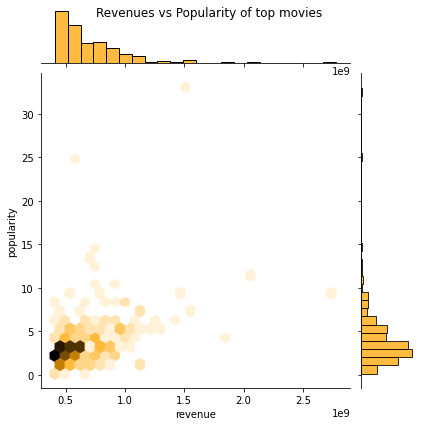

In [166]:
sns.jointplot(data=df_high_rev, x='revenue', y='popularity', kind='hex', color='orange').fig.suptitle('Revenues vs Popularity of top movies')

#### As shown, Most of the top revenues didn't have higher popularity and that reflects that their other factors affecting popularity

Text(0.5, 0.98, 'Revenues vs Budgets of top movies')

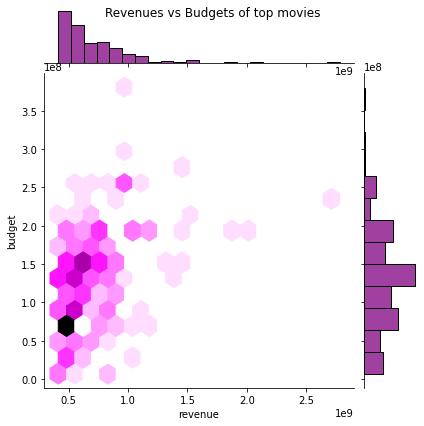

In [167]:
sns.jointplot(data=df_high_rev, x='revenue', y='budget', kind='hex',color='purple').fig.suptitle('Revenues vs Budgets of top movies')

#### There is a little correlation between budget and revenues which indicates that higher budget don't always cause higher revenues

#### There isn't any correlation between vote_averages and revenues which indicates that higher revenues don't always reflect higher ratings

<AxesSubplot:title={'center':'revenue'}, xlabel='[release_year]'>

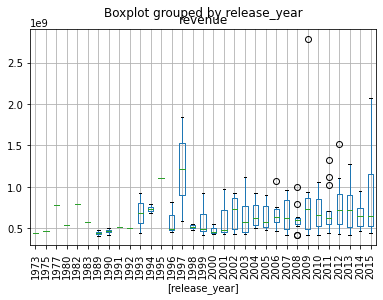

In [169]:
df_high_rev.boxplot(column=['revenue'], by=['release_year'], rot=90)


Text(0.5, 0.98, 'Revenues of top movies over years')

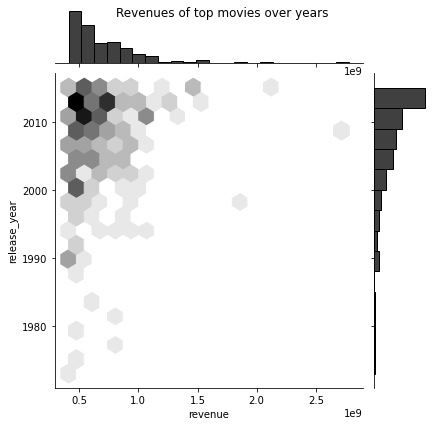

In [170]:
sns.jointplot(data=df_high_rev, x='revenue', y='release_year', kind='hex', color='black').fig.suptitle('Revenues of top movies over years')

#### As shown, Movies in recent years have higher revenues but that may not be realistic without taking inconsideration the inflation of revenues and budgets

Text(0.5, 0.98, 'Relations between different attributes of top movies')

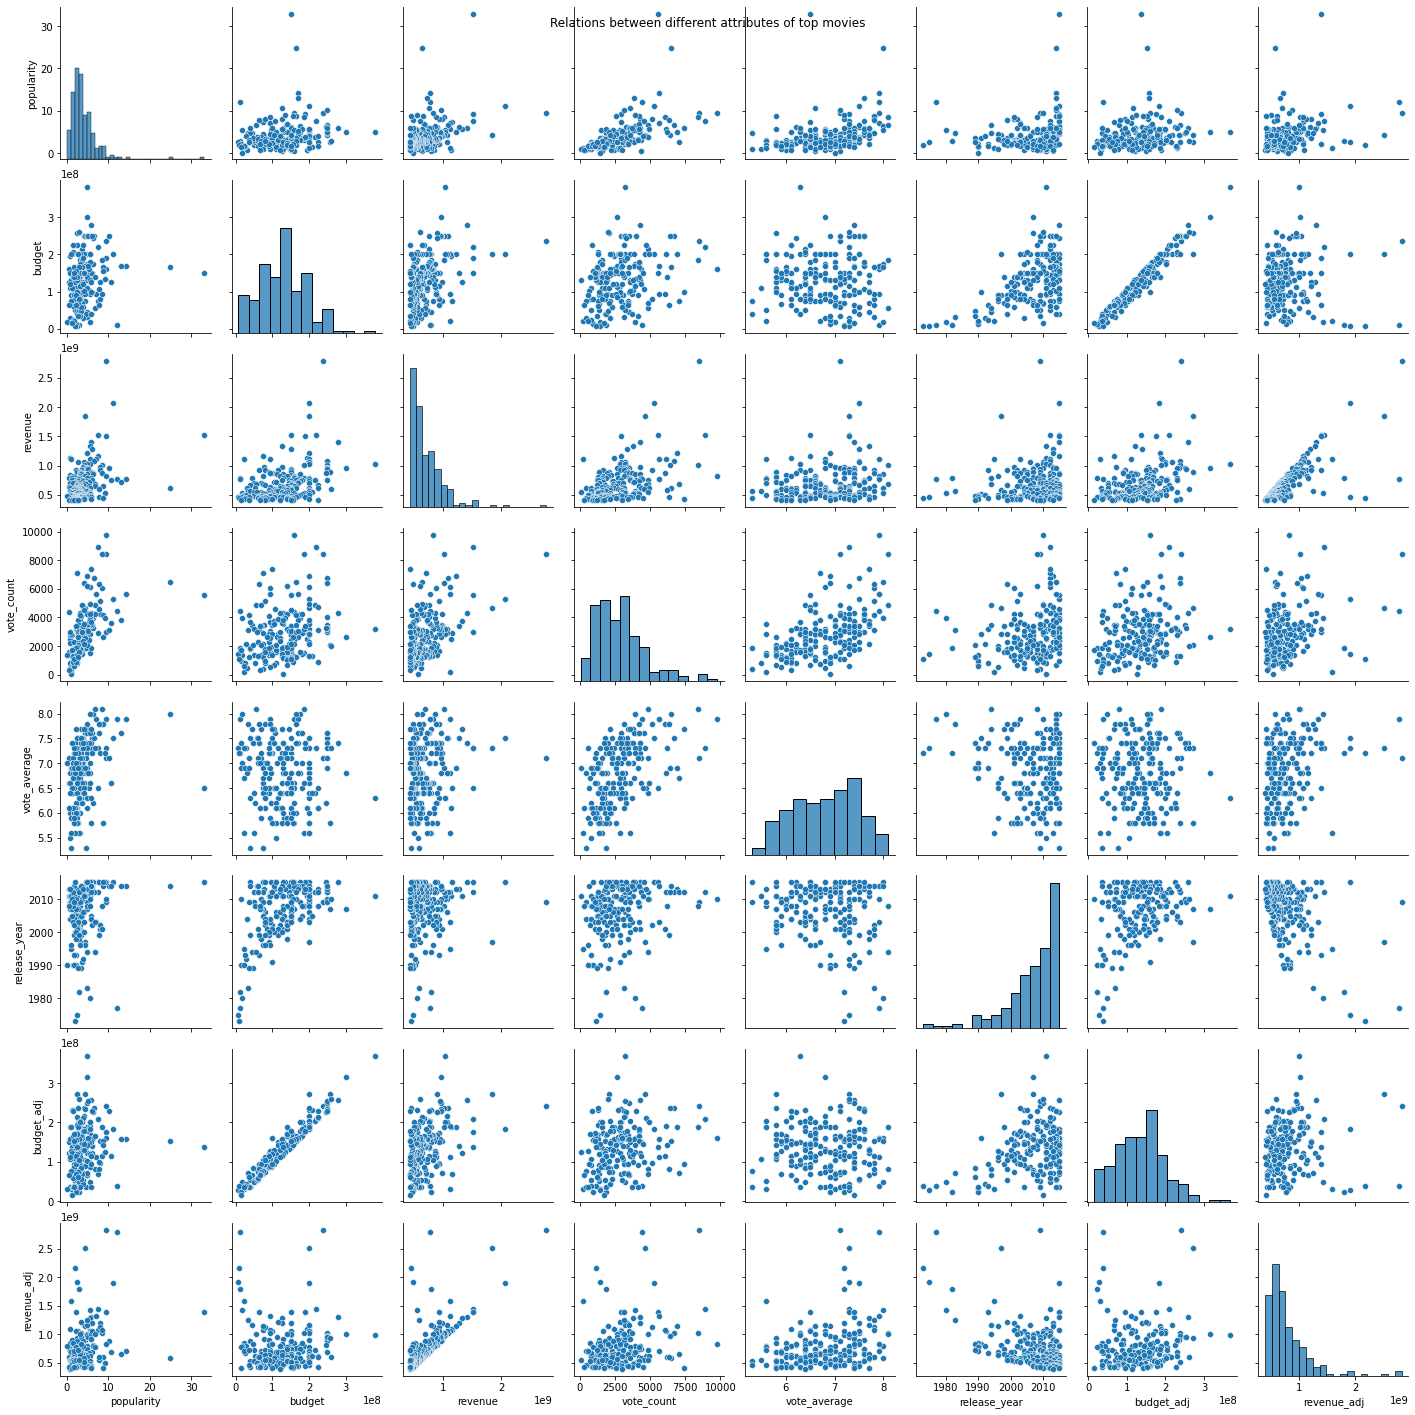

In [171]:
sns.pairplot(df_high_rev).fig.suptitle('Relations between different attributes of top movies')

<a id='conclusions'></a>
## Conclusions


### Number of movies per years has been increasing rapidly
### Popularity and ratings have been increasing also throgh the years as the recent movies recieved higher ratings
### Revenues and budgets have been increasing every year


### Average votes for the movies are between 5 and 7
### Votes have high correlation popularity of the movie


### The most widespread genre of movies is the Drama followed by Thiller and Action genres
### Movies whose genres are Action and Drama have greater Popularity and votes


### Most of the high revenue_movies came after year 2000
### Revenues mainly don't have higher votes
### Revenues highest correlations was with budgets, popularity and ratings


## Limitations

### Although number of samples (10866 ) is quiet big but it didn't have data about movies before year 1980 which didn't provide a full picture about this period.
### There were a lot of irrelevant attributes which weren't necessary such as tagline, keywords and overview.
### There were only one source of ratings which may not reflect all the reviews for movies. There should be more than one source like audiance and critics.